# 2 For this activity you will use the date set “Car Evaluation”
which is available for download on: Car
Evaluation - UCI Machine Learning Repository
The Car Evaluation Database contains basic car features such as price, technical and comfort
information, as well as the market acceptability of the vehicle.



1.   Provide some insights on the data such as shape, distribution and cross-category
comparisons (data exploration)
1.   Given Logistic Regression, Random Forest Classifier and Decision Tree, which model
performs better when predicting car class? Justify your answer with data.
2.   Rank feature importance with respect to Random Forest Model and share your insights.
2.   Present a visualization of the Decision Tree and share your insights.



## Imports

In [ ]:
pip install --upgrade category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import category_encoders as ce

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
#import warnings
#from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

df_original = pd.concat([X, y], axis=1)


## Provide some insights on the data such as shape, distribution and cross-category comparisons (data exploration)



*   **Unacc** categoria predominante o que representa 70% dos casos da base
*   O **numero de portas** gerou uma distribuicao mais uniforme e carros com 5 ou mais portas receberam uma nota levemente melhor
*   Carros com a **segurança baixa** demonstra uma classificação total de unacc
*   Carros com **portamala grande** receberam boas notas
*   Carros com **valores altos** nao receberam boas avaliações.

Os insights gerados, seriam para os fabricantes de automoveis, focar em seguranca, com baixo custo e espaço para melhor atender as espectativas do mercado.




### Describe, head , shape


In [6]:
df_original.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df_original.shape

(1728, 7)

In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df_original.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [10]:
df_original['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
df_original['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

### Verifying Nan e nulls

In [12]:
#Checking Null Values
df_original.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
df_original.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
#Checking Duplicates
df_original_duplicates_rows=df_original[df_original.duplicated()]
df_original_duplicates_rows

,buying,maint,doors,persons,lug_boot,safety,class


### Grouping analisys

In [15]:
frequencia = df_original['class'].value_counts()
percentual = df_original['class'].value_counts(normalize = True)
print(frequencia)
print(percentual)

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


In [16]:
dist_freq_qualitativa = pd.DataFrame({'frequencia' : frequencia, 'Porcentagem (%)' : percentual})
dist_freq_qualitativa

,frequencia,Porcentagem (%)
unacc,1210,0.700231
acc,384,0.222222
good,69,0.039931
vgood,65,0.037616


### Ploting comparisons

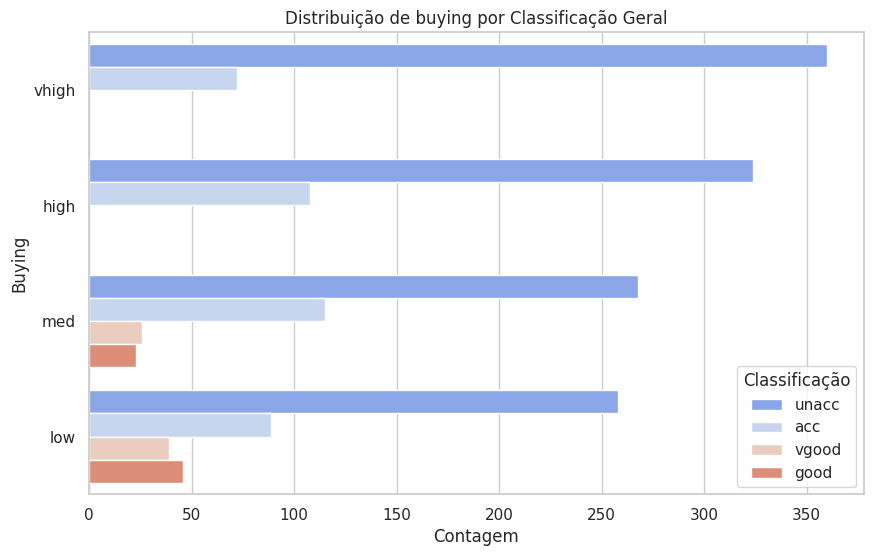

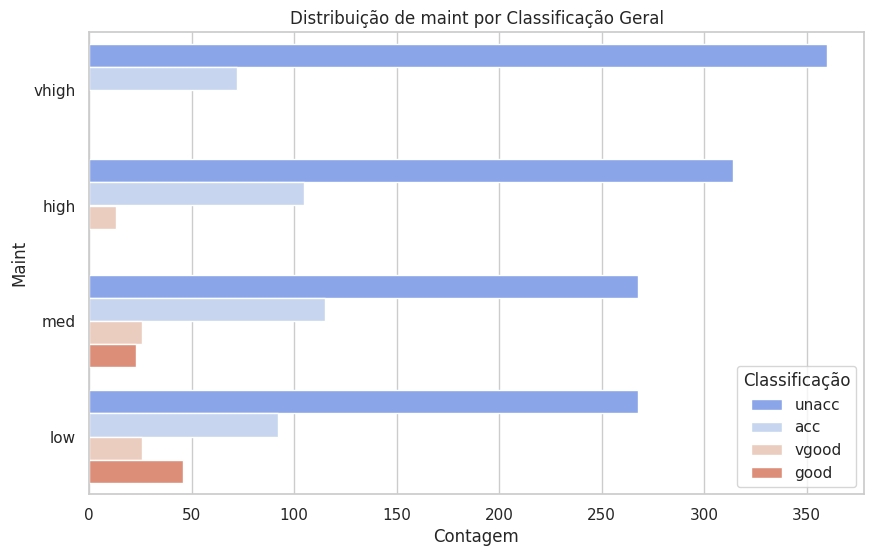

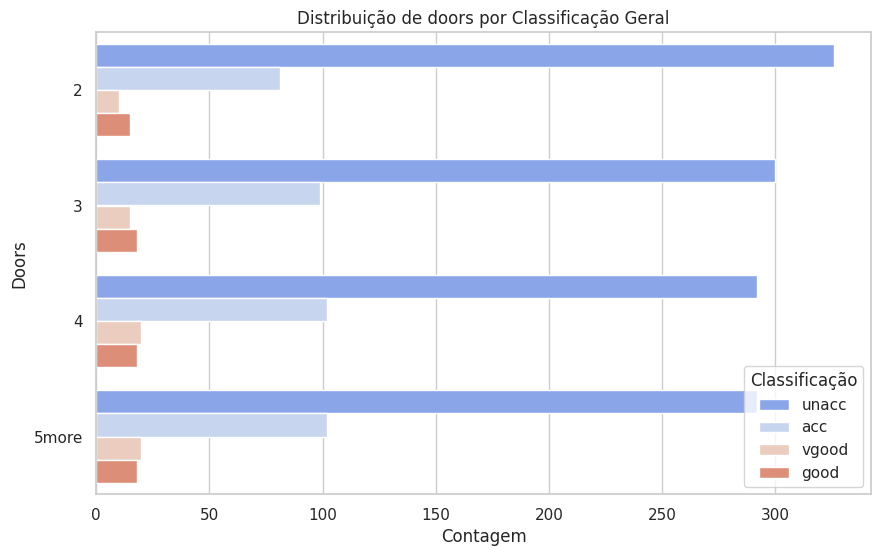

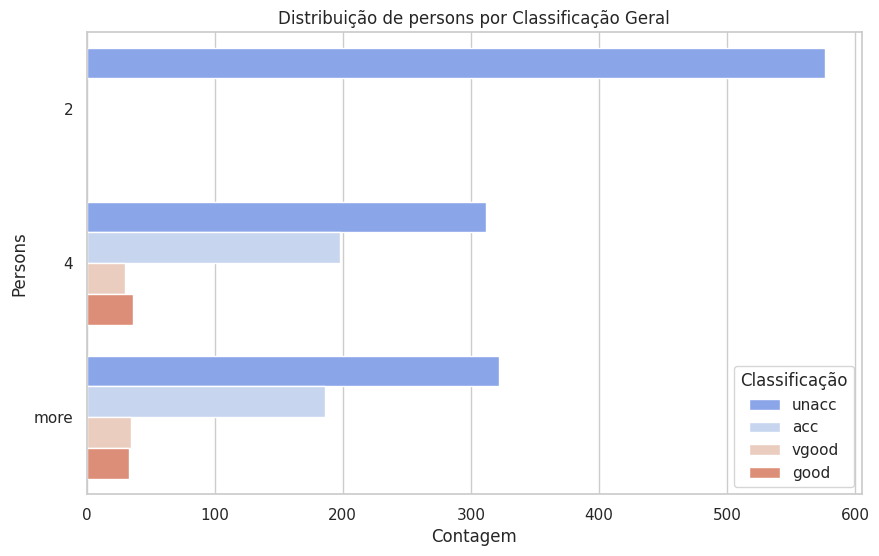

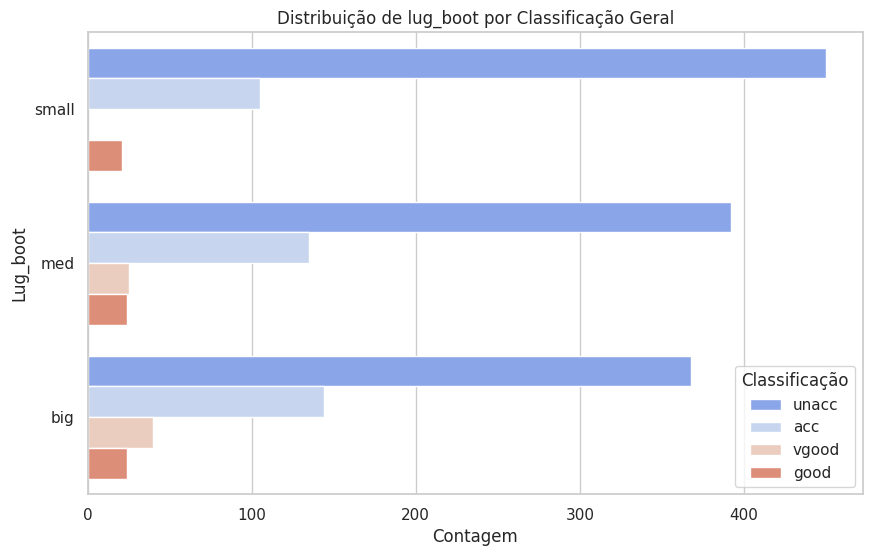

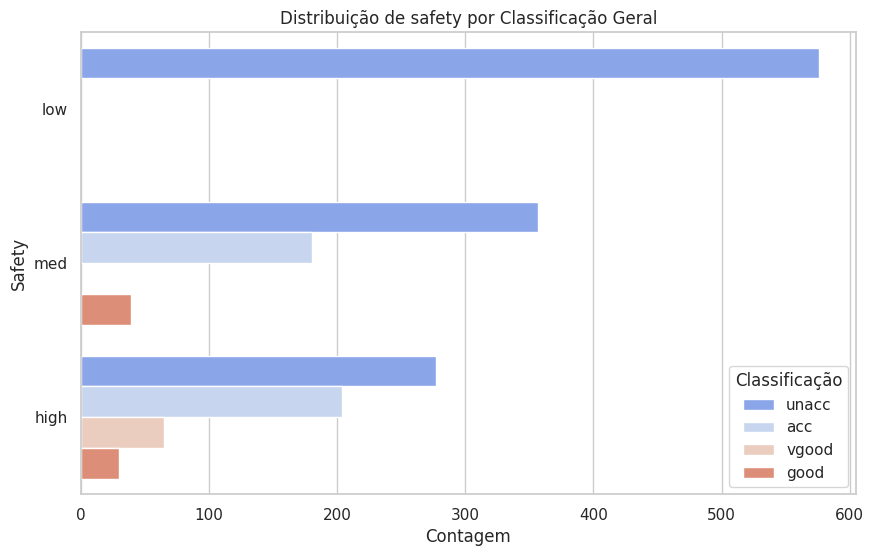

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações básicas para plots
sns.set(style="whitegrid")

# Função para criar gráficos de contagem para cada característica em relação à classificação geral
def plot_feature_distribution(feature, data):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, hue="class", data=data, palette="coolwarm")
    plt.title(f"Distribuição de {feature} por Classificação Geral")
    plt.xlabel("Contagem")
    plt.ylabel(feature.capitalize())
    plt.legend(title="Classificação")
    plt.show()

# Gerar gráficos para cada característica
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for feature in features:
    plot_feature_distribution(feature, df_original)


# Given Logistic Regression, Random Forest Classifier and Decision Tree, which model performs better when predicting car class? Justify your answer with data.

During the comparative analysis of machine learning models, it's observed that the Random Forest model outperformed the Decision Tree and Logistic Regression models. While the former achieved accuracy rates of 81.9% and 75.72% respectively, their macro f1-score scores were 39.98% and 35.14%, which can be attributed to the "unacc" class, negatively impacting the macro f1-score accuracy.

On the other hand, the Random Forest model exhibited an accuracy rate of 96.82%, accompanied by a macro f1-score of 89%. This remarkable performance reflects the model's capability to make precise predictions for the "unacc" class, thereby elevating its macro f1-score.

### Imports

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

from matplotlib.cm import get_cmap
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Models

In [19]:
# Define single classifiers (monolithic Classifiers)
dt =  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Define ensembles (homogeneous and heterogeneous)
rf = RandomForestClassifier(n_estimators=50, random_state=0)
lg = LogisticRegression()

titles = ['DecisionTree','RF', 'Logistic Regression']
methods = [dt, rf, lg]

In [20]:
from sklearn.metrics import accuracy_score

def formatar_ponto(valor):
  return '{:,}'.format(valor).replace(',','.')

def recebe_x_y_retorna_accuracia(X_train, X_test, y_train, y_test):
  scores = []
  for method, name in zip(methods, titles):
      method.fit(X_train, y_train)
      accuracia = round(method.score(X_test, y_test)* 100, 2)
      scores.append(accuracia)
      #print("Classification accuracy {} = {}%".format(name, accuracia))
  return scores


### Train teste split

In [21]:
X = df_original.drop(['class'], axis=1)

y = df_original['class']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#recebe_x_y_retorna_accuracia(X_train, X_test, y_train, y_test)

In [23]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [24]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [26]:
print(methods)
print(titles)

[DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0), RandomForestClassifier(n_estimators=50, random_state=0), LogisticRegression()]
['DecisionTree', 'RF', 'Logistic Regression']


## def accuracy_confusion_matrix and models

In [29]:
def accuracy_confusion_matrix(position):
  methods[position].fit(X_train, y_train)
  accuracia = round(methods[position].score(X_test, y_test)* 100, 2)
  #scores.append(accuracia)
  print("Classification accuracy {} = {}%".format(titles[position], accuracia))

  y_pred = methods[position].predict(X_test)

  soma = y_pred.sum()

  corretos = (y_pred == y_test).sum()
  total = len(X_train) + len(X_test)

  precision,recall,fscore,support = precision_recall_fscore_support(y_test,y_pred,average='macro')

  taxa_de_acerto = accuracy_score(y_test, y_pred)
  print('')
  print("Taxa de acerto : %.2f" % (taxa_de_acerto * 100))
  print('F1 Score Macro : %.2f' % (fscore * 100))

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred)

  print('------------ Modelo {} ------------------'.format(titles[position]))
  print('')

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['acc','acc','unacc', 'vgood'],)
  disp.plot(cmap="Blues")

### Decision Tree

Classification accuracy DecisionTree = 81.79%

Taxa de acerto : 81.79
F1 Score Macro : 39.98
------------ Modelo DecisionTree ------------------



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


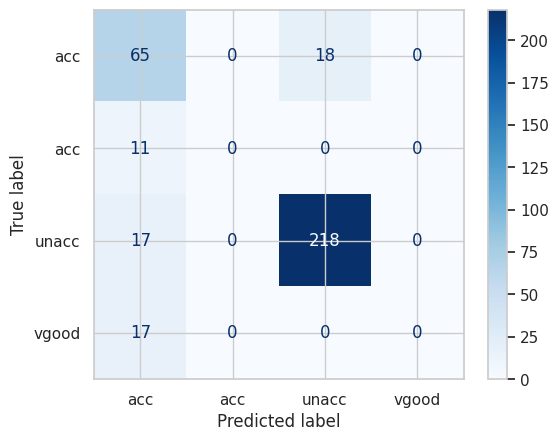

In [30]:
accuracy_confusion_matrix(0)

### Random Forest

Classification accuracy RF = 96.82%

Taxa de acerto : 96.82
F1 Score Macro : 89.09
------------ Modelo RF ------------------



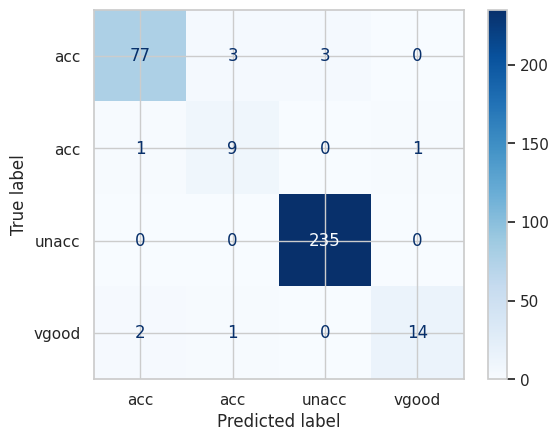

In [31]:
accuracy_confusion_matrix(1)

### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification accuracy Logistic Regression = 75.72%

Taxa de acerto : 75.72
F1 Score Macro : 35.14
------------ Modelo Logistic Regression ------------------



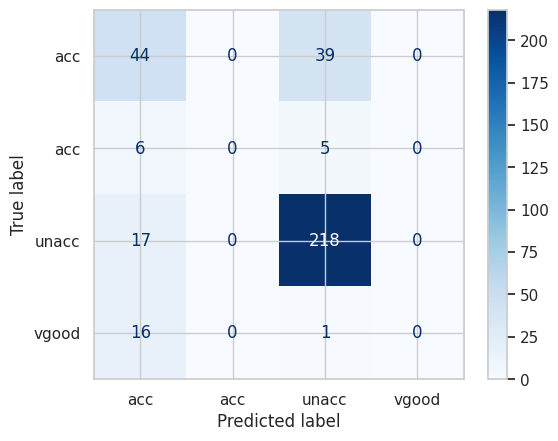

In [32]:
accuracy_confusion_matrix(2)

# Rank feature importance with respect to Random Forest Model and share your insights.

In [ ]:
# Treinando o modelo RandomForest
model = methods[1]
model.fit(X_test, y_test)

# Obtendo a importância das features
importances = model.feature_importances_

# Criando um array com os índices das features, ordenados pela importância
indices = np.argsort(importances)[::-1]

# Printando o ranking das features
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 3 (0.2691986979807004)
2. feature 5 (0.2563174086630211)
3. feature 0 (0.1776372557208249)
4. feature 1 (0.138099034138423)
5. feature 2 (0.08678911070510921)
6. feature 4 (0.07195849279192144)


In [ ]:
colunas_originais = df_original.columns
colunas_originais

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
lista_indices = [indices]
lista_ordenada = [colunas_originais[i] for i in lista_indices]
lista_ordenada

[Index(['persons', 'safety', 'buying', 'maint', 'doors', 'lug_boot'], dtype='object')]

# Present a visualization of the Decision Tree and share your insights.

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'entropy = 1.693\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

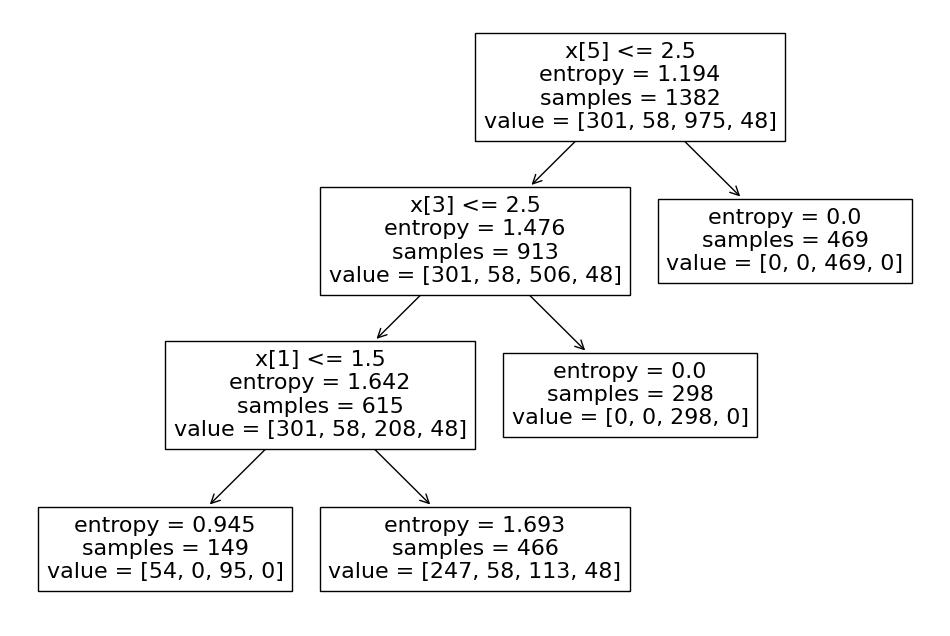

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(methods[0].fit(X_train, y_train))

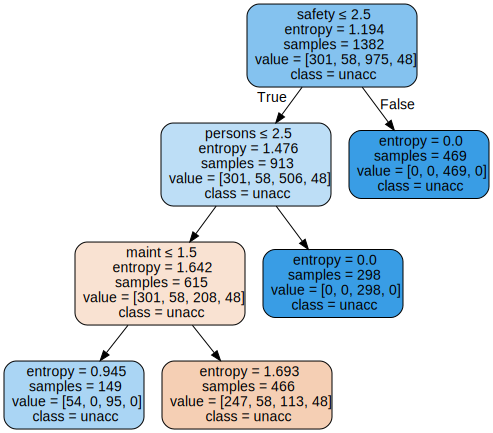

In [ ]:
import graphviz
dot_data = tree.export_graphviz(methods[0], out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph